## Date - 22/10/2023
## Team ID - 3923
## Project Title - Customer churn prediction 

The dataset used in this analysis is from Kaggle [Telcom Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv)

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 



## Data Interpretation

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
import plotly.plotly as py
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Feature Selection
### Correlation Matrix

In [ ]:
telcom = pd.read_csv('./Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcom['TotalCharges'] = telcom['TotalCharges'].apply(lambda x: x.replace(' ',''))
telcom['TotalCharges'] = telcom['TotalCharges'].apply(lambda x: float(x) if len(x)!=0 else 0)
telcom_cp = telcom.copy()
col_type = telcom.columns.to_series().groupby(telcom.dtypes).groups
print(col_type)

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'), dtype('float64'): Index(['MonthlyCharges', 'TotalCharges'], dtype='object'), dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')}


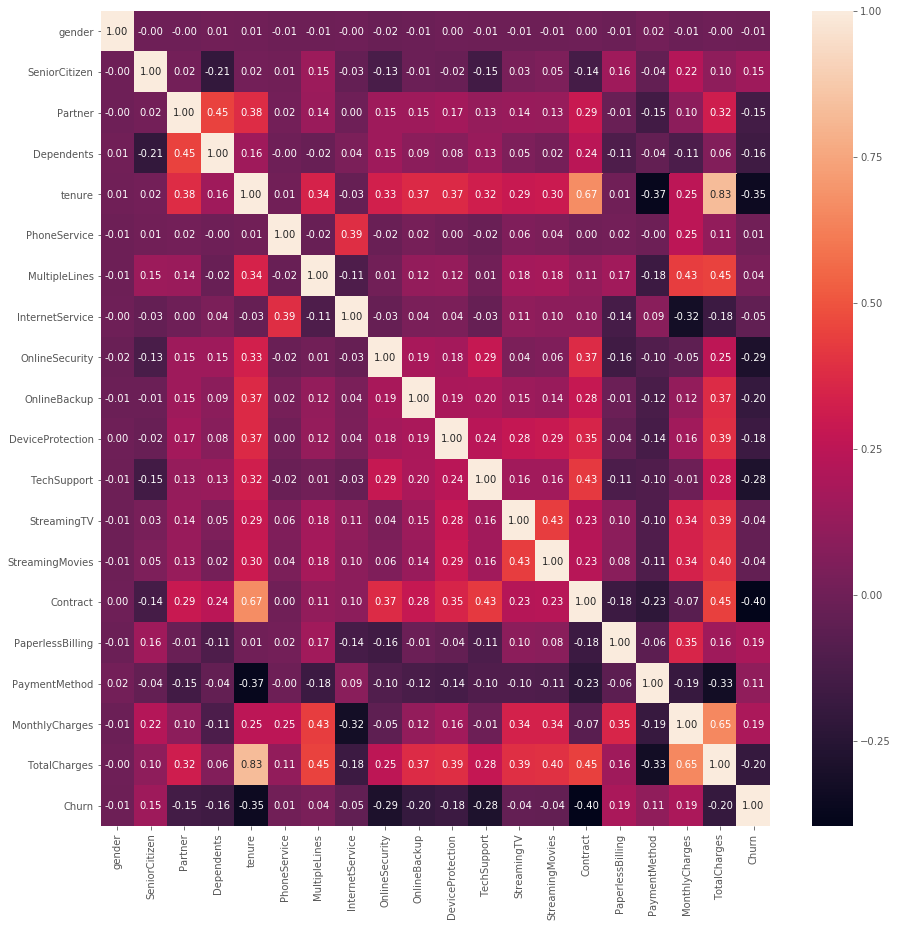

In [ ]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in cat_cols:
    le = preprocessing.LabelEncoder()
    telcom_cp[col] = le.fit_transform(telcom_cp[col].tolist())
    
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
ss = preprocessing.StandardScaler()
telcom_cp[num_cols] = ss.fit_transform(telcom_cp[num_cols])

correlation = telcom_cp.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, annot_kws={"size": 10}, fmt='.2f')

plt.savefig('./Output/5pearson correlation.png')
plt.show()

* Strong correlations (>0.6) between tenure and TotalCharges / Contract;  TotalCharges & MonthlyCharges; Since all these features have relatively stronger correlation with the target variable Churn, these will be kept for model training
* Phone service has little correlation with Churn, but has correlations with InternetService and charges, will be kept for model training

* Gender has little correlation with target varible and other features, can be dropped out of the feature list

### Churn Correlation Analysis

In [ ]:
Churn_corr = correlation[['Churn']]
Churn_corr = Churn_corr.sort_values('Churn')
Churn_corr = Churn_corr.drop('Churn',axis=0)
Churn_corr

,Churn
Contract,-0.396713
tenure,-0.352229
OnlineSecurity,-0.289309
TechSupport,-0.282492
TotalCharges,-0.198324
OnlineBackup,-0.195525
DeviceProtection,-0.178134
Dependents,-0.164221
Partner,-0.150448
InternetService,-0.047291


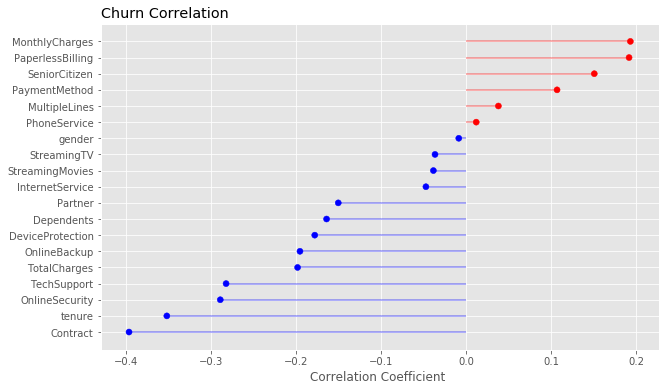

In [ ]:
# Create a color if churn or not
my_color=np.where(Churn_corr ['Churn']>0, 'red', 'blue')
my_range=range(1,len(Churn_corr.index)+1)

#my_size=np.where(Churn_corr ['Churn']>0, 70, 30)

plt.figure(figsize=(10,6))
plt.hlines(y=my_range, xmin=0, xmax=Churn_corr ['Churn'], color=my_color, alpha=0.4)
plt.scatter(Churn_corr ['Churn'], my_range, color=my_color, alpha=1)
 
# Add title and exis names
plt.yticks(my_range, Churn_corr.index)
plt.title("Churn Correlation", loc='left')
plt.xlabel('Correlation Coefficient ')

plt.savefig('./Output/6Churn correlation.png')